# **Git Repo Cloning and Importing/Installing Necessary Packages**

In [ ]:
!git clone https://github.com/ISSeminarGNNSOTA/ISS_Seminar_GNN_SOTA.git

import sys
if not 'ISS_Seminar_GNN_SOTA' in sys.path:
    sys.path += ['ISS_Seminar_GNN_SOTA']

fatal: destination path 'ISS_Seminar_GNN_SOTA' already exists and is not an empty directory.


In [ ]:
##RUN THIS CELL TO RETRIEVE THE ORIGINAL DATASET
##I'VE ZIPPED THE ORIGINAL DATASET AND THEN UPLOADED IT TO THE GIT REPO. AND THIS LINE IS EXTRACTING
##THE CSV FILE IN THE ZIP TO 'ISS_Seminar_GNN_SOTA/data/'

import zipfile
import os

# Path to the zip file in your repository
zip_file_path = 'ISS_Seminar_GNN_SOTA/data/df_9500_17152.zip'

# Directory where you want to extract the files
extracted_dir = 'ISS_Seminar_GNN_SOTA/data/'

# Create a directory to extract the files
os.makedirs(extracted_dir, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# List the contents of the extracted directory
extracted_files = os.listdir(extracted_dir)

# Now you can access and work with the CSV files in the extracted directory
for file in extracted_files:
    if file.endswith('.csv'):
        csv_file_path = os.path.join(extracted_dir, file)


In [ ]:
## I think we can use this code to create our requirement file which includes the dependencies.
# However, it will include some unnecessary packages that we don't need which is not a blocker but just unnecessary.
#pip freeze > requirements.txt

**Importing and Installing Necessary Libraries and Modules**

In [ ]:
!pip install torch_geometric
!pip install sentence_transformers
!pip install node2vec networkx
!pip install optuna

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import optuna
import pandas as pd
import numpy as np
from torch_geometric.data import HeteroData
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from data_preprocessing.movtit_nlp_v3 import MovieTitlesProcessor
from data_preprocessing.data_preprocess_v5 import DataPreprocessor
from data_preprocessing.graphDataBuilder2Fold import GraphDataBuilder2Fold
from data_preprocessing.graphSplitter import GraphSplitter
from models.graph_predictor import Predictor
from models.graph_attentional_network import Encoder
from models.graph_convolutional_network import Encoder
from models.graph_sage_network import Encoder
from models.graph_attentional_network import GAT
from models.graph_convolutional_network import GCN
from models.graph_sage_network import GraphSAGE
from hyperparameter_optimization.graphStudy import GraphStudy
from data_preprocessing.dataToGraph import DataToGraph
from models.benchmark.lr_ridge import LRModel
from models.benchmark.mlp import MLPModelOptimized
from models.benchmark.xgb import XGBModel

# **Data Preprocessing**

**Initial Preprocessing and Create Main Variables**

In [ ]:
#Loading the Data
df = pd.read_csv('ISS_Seminar_GNN_SOTA/data/df_9500_17152.csv')
df_movie = pd.read_excel('ISS_Seminar_GNN_SOTA/data/movie_titles.xlsx')

#Initializing Data Preprocessor
preprocessor = DataPreprocessor(df, df_movie)

#Filtering Data
preprocessor.filter_data(0,50)


#To get the new variables (avg, count, releaseage etc.) on ratings dataframe and to get movieInfo and userInfo dataframes
preprocessor.create_rating_user_movie_info()


**Perform NLP and Get Dummy Clusters**

In [ ]:
#To apply NLP to movie_titles and get cluster dummies
#preprocessor.perform_nlp_tasks()  (This line is in comment because it does not improve the models.)

**Get Embeddings with Node2Vec or DeepWalk**

In [ ]:
#To apply node2vec in order to get node embeddings
#preprocessor.get_node_embeddings_node2vec()  (This line is in comment because of technical incapabilities.)

#To apply deepwalk in order to get node embeddings
#preprocessor.get_node_embeddings_deepwalk()  (This line is in comment because of technical incapabilities.)

**Presave Processed Input Data**

In [ ]:
pre_processed_ratings = preprocessor.ratings
userInfo = preprocessor.userInfo
movieInfo = preprocessor.movieInfo

**Build the Graph Data**

In [ ]:
data_builder = data_preprocessing.GraphDataBuilder2Fold(userInfo, movieInfo, pre_processed_ratings)
data, train_data_1, val_data_1, train_data_2, val_data_2, train_data_final, test_data = data_builder.build_data()

# **Models**

## **Benchmark Models**

### **XGBoost**

Train and Evaluate the Model

In [ ]:
# Initialize the MLP model
xgb_model = XGBModel(pre_processed_ratings)

# Tune hyperparameters
xgb_model.tune_hyperparameters(n_trials=50)

# Train and evaluate the model
xgb_model.train_model()


[I 2024-03-23 15:44:48,893] A new study created in memory with name: no-name-5b3f9129-d3b4-4ce0-8217-9e8ab4a05dca
[I 2024-03-23 15:44:49,056] Trial 0 finished with value: 0.7705667097705908 and parameters: {'colsample_bytree': 0.8711727029000264, 'learning_rate': 0.0739516718594795, 'max_depth': 10, 'alpha': 88.66778833060329, 'n_estimators': 190}. Best is trial 0 with value: 0.7705667097705908.
[I 2024-03-23 15:44:49,223] Trial 1 finished with value: 0.7658307360203422 and parameters: {'colsample_bytree': 0.33413702450438554, 'learning_rate': 0.061114288157509224, 'max_depth': 19, 'alpha': 17.760784609692926, 'n_estimators': 236}. Best is trial 1 with value: 0.7658307360203422.
[I 2024-03-23 15:44:49,468] Trial 2 finished with value: 0.7754696133885566 and parameters: {'colsample_bytree': 0.8494260159994341, 'learning_rate': 0.20121413806988833, 'max_depth': 6, 'alpha': 3.6949691224394954, 'n_estimators': 235}. Best is trial 1 with value: 0.7658307360203422.
[I 2024-03-23 15:44:49,544

Best trial: 47
Fold RMSE scores: [0.7408907445242126, 0.7537907254783922]
Best parameters: {'colsample_bytree': 0.6047824265178322, 'learning_rate': 0.13130183222567415, 'max_depth': 3, 'alpha': 4.777464163462096, 'n_estimators': 222}
Model trained. Time taken: 0.25 seconds
Training MSE: 0.5159, Training RMSE: 0.7183, Training MAE: 0.5288
Test MSE: 0.5729, Test RMSE: 0.7569, Test MAE: 0.5636


Create the Classification Report

In [ ]:
# Access the predicted y values for the test set
y_pred_test = xgb_model.model.predict(xgb_model.X_test)

round_preds = np.round(y_pred_test)
preds_rounded = np.where(round_preds < 1, 1, np.where(round_preds > 5, 5, round_preds))
labels = xgb_model.ratings[['Rating']][-int(len(xgb_model.ratings) * 0.1):].values
print(classification_report(y_true=labels, y_pred=preds_rounded))

              precision    recall  f1-score   support

           1       1.00      0.15      0.26        41
           2       0.45      0.18      0.25        85
           3       0.47      0.57      0.52       305
           4       0.58      0.74      0.65       507
           5       0.74      0.30      0.43       191

    accuracy                           0.56      1129
   macro avg       0.65      0.39      0.42      1129
weighted avg       0.59      0.56      0.53      1129



Plot the Confusion Matrix

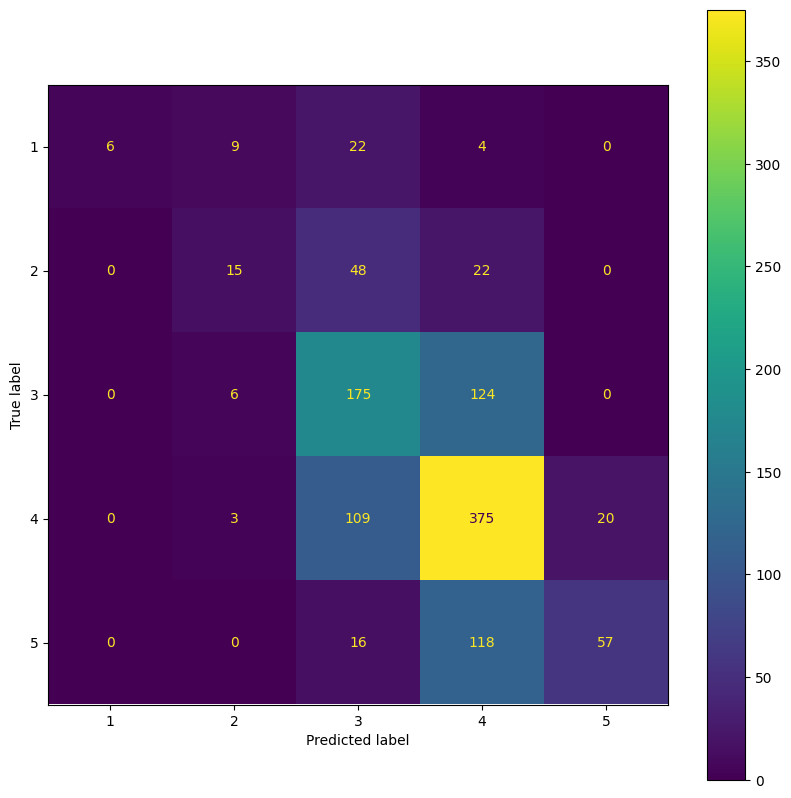

In [ ]:
# Convert labels to unique values
labels_tensor = labels
unique_labels = np.unique(labels)

# Assuming y_pred and y_test are numpy arrays
# y_pred = np.round(preds.detach().numpy())
# Assuming preds_rounded is defined
y_pred = preds_rounded
y_test = labels

# Calculate confusion matrix
cm = confusion_matrix(labels, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()


### **MLP**

Train and Evaluate the Model

In [ ]:
# Initialize the MLP model
mlp_model = MLPModelOptimized(pre_processed_ratings)

# Tune hyperparameters
mlp_model.tune_hyperparameters(n_trials=50)

# Train and evaluate the model
mlp_model.train_and_evaluate_model()

[I 2024-03-23 15:45:07,997] A new study created in memory with name: no-name-817e8d12-b428-4021-99e6-6c2579213bb6
[I 2024-03-23 15:45:18,654] Trial 0 finished with value: 0.5562143148913189 and parameters: {'hidden_layer_sizes_option': '50', 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.08191106089089532, 'learning_rate_init': 0.0029979648171385804}. Best is trial 0 with value: 0.5562143148913189.
[I 2024-03-23 15:45:35,317] Trial 1 finished with value: 0.5565384456049054 and parameters: {'hidden_layer_sizes_option': '100', 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0046509558279498745, 'learning_rate_init': 0.00017317135404797005}. Best is trial 0 with value: 0.5562143148913189.
[I 2024-03-23 15:45:51,792] Trial 2 finished with value: 0.5720683792786654 and parameters: {'hidden_layer_sizes_option': '100', 'activation': 'tanh', 'solver': 'adam', 'alpha': 1.1910043094236592e-05, 'learning_rate_init': 7.71676551893507e-05}. Best is trial 0 with value: 0.5562143148913189.
[I 2

Best parameters: {'activation': 'relu', 'solver': 'sgd', 'alpha': 6.570081440063055e-05, 'learning_rate_init': 0.0024270023222787524, 'hidden_layer_sizes': (100, 100)}
Training MSE: 0.5273, RMSE: 0.7261, MAE: 0.5367
Test MSE: 0.5719, RMSE: 0.7563, MAE: 0.5591


Create the Classification Report

In [ ]:
# Access the predicted y values for the test set
y_pred_test = mlp_model.model.predict(mlp_model.X_test)

round_preds = np.round(y_pred_test)
preds_rounded = np.where(round_preds < 1, 1, np.where(round_preds > 5, 5, round_preds))
labels = mlp_model.ratings[['Rating']][-int(len(mlp_model.ratings) * 0.1):].values
print(classification_report(y_true=labels, y_pred=preds_rounded))

              precision    recall  f1-score   support

           1       1.00      0.20      0.33        41
           2       0.42      0.16      0.24        85
           3       0.46      0.53      0.49       305
           4       0.57      0.75      0.65       507
           5       0.78      0.31      0.44       191

    accuracy                           0.55      1129
   macro avg       0.65      0.39      0.43      1129
weighted avg       0.58      0.55      0.53      1129



Plot the Confusion Matrix

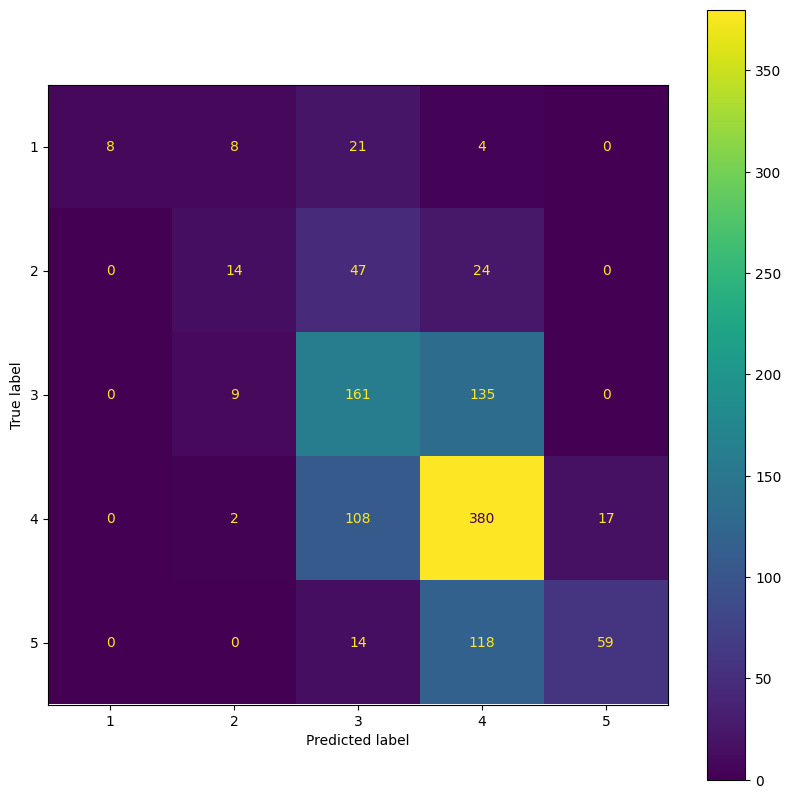

In [ ]:
# Convert labels to unique values
labels_tensor = labels
unique_labels = np.unique(labels)

# Assuming y_pred and y_test are numpy arrays
# y_pred = np.round(preds.detach().numpy())
# Assuming preds_rounded is defined
y_pred = preds_rounded
y_test = labels

# Calculate confusion matrix
cm = confusion_matrix(labels, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()


### **Ridge** **LR**

Train and Evaluate the Model

In [ ]:
# Step 1: Initiate the class
lr_model = LRModel(pre_processed_ratings)

# Step 2 (optional): Tune hyperparameters
lr_model.tune_hyperparameters(n_trials=5)

# Step 3: Train the model and evaluate its performance
lr_model.train_and_evaluate()

[I 2024-03-23 16:03:37,328] A new study created in memory with name: no-name-41c440c9-98d7-43c4-82fd-fe661b6924b5
/content/ISS_Seminar_GNN_SOTA/models/benchmark/lr_ridge.py:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 0.0001, 10)
[I 2024-03-23 16:03:37,340] Trial 0 finished with value: 0.7550267542065915 and parameters: {'alpha': 0.04851335726526668}. Best is trial 0 with value: 0.7550267542065915.
/content/ISS_Seminar_GNN_SOTA/models/benchmark/lr_ridge.py:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 0.0001, 10)
[I 2024-03-23 16:03:37,350] Trial 1 finished with value: 0.7550267

Best alpha: 0.04851335726526668
Final Evaluation on Test Set - MSE: 0.5680, RMSE: 0.7537, MAE: 0.5602


Create the Classification Report

In [ ]:
# Access the predicted y values for the test set
y_pred_test = lr_model.model.predict(lr_model.X_test)

round_preds = np.round(y_pred_test)
preds_rounded = np.where(round_preds < 1, 1, np.where(round_preds > 5, 5, round_preds))
labels = lr_model.ratings[['Rating']][-int(len(lr_model.ratings) * 0.1):].values
print(classification_report(y_true=labels, y_pred=preds_rounded))

              precision    recall  f1-score   support

           1       1.00      0.15      0.26        41
           2       0.52      0.15      0.24        85
           3       0.49      0.55      0.52       305
           4       0.58      0.80      0.67       507
           5       0.87      0.27      0.41       191

    accuracy                           0.57      1129
   macro avg       0.69      0.38      0.42      1129
weighted avg       0.62      0.57      0.54      1129



Plot the Confusion Matrix

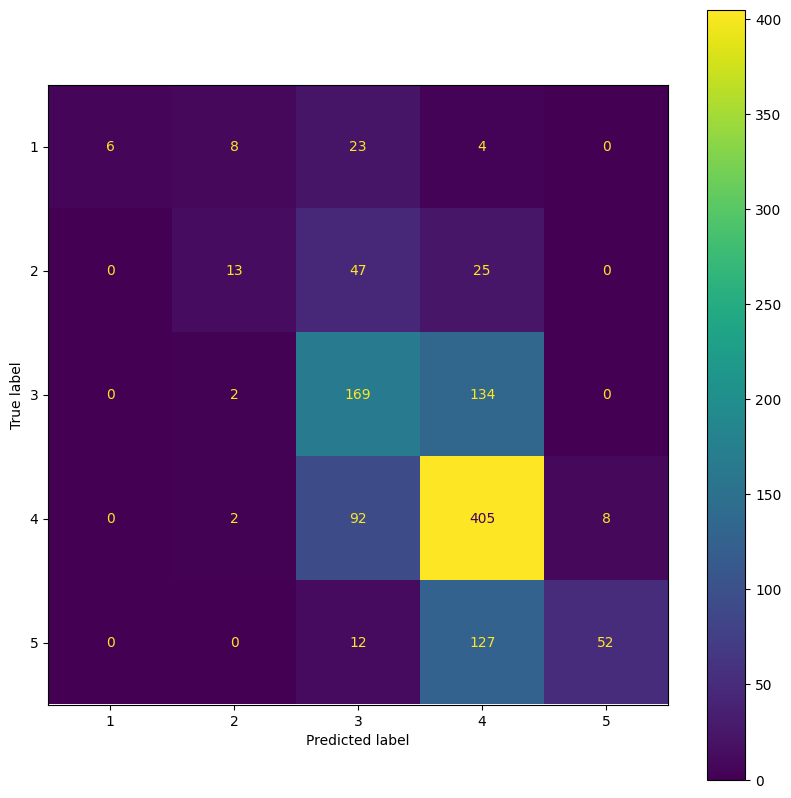

In [ ]:
# Convert labels unique values
labels_tensor = labels
unique_labels = np.unique(labels)

# Assuming y_pred and y_test are numpy arrays
# y_pred = np.round(preds.detach().numpy())
# Assuming preds_rounded is defined
y_pred = preds_rounded
y_test = labels

# Calculate confusion matrix
cm = confusion_matrix(labels, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()


## **GNNs**


### **GCN**

Train the Model

In [ ]:
#GCN
trainer = hyperparameter_optimization.GraphStudy(train_data_1, train_data_2, val_data_1, val_data_2, train_data_final, data, flag=1, EPOCHS=30, LR=0.0001)
study, best_model = trainer.run_study(n_trials=50)

[I 2024-03-23 16:03:37,778] A new study created in memory with name: no-name-b4b05bcc-7105-44d3-b9f2-70aecbba578d
[I 2024-03-23 16:03:57,462] Trial 0 finished with value: 2263.100568026597 and parameters: {'hidden_channels_encoder': 233, 'latent_space_dim': 170, 'hidden_channels_predictor': 168, 'dropout_rate': 0.06573518680391903}. Best is trial 0 with value: 2263.100568026597.
[I 2024-03-23 16:04:05,651] Trial 1 finished with value: 4065.0022332163 and parameters: {'hidden_channels_encoder': 64, 'latent_space_dim': 218, 'hidden_channels_predictor': 104, 'dropout_rate': 0.7952970118476735}. Best is trial 0 with value: 2263.100568026597.
[I 2024-03-23 16:04:18,808] Trial 2 finished with value: 5026.899706984121 and parameters: {'hidden_channels_encoder': 92, 'latent_space_dim': 215, 'hidden_channels_predictor': 158, 'dropout_rate': 0.7353829164087178}. Best is trial 0 with value: 2263.100568026597.
[I 2024-03-23 16:04:26,731] Trial 3 finished with value: 2844.1878040475526 and paramete

Evaluate the Model

In [ ]:
best_model.eval()
with torch.no_grad():
    test_output = best_model(test_data.x_dict, test_data.edge_index_dict, test_data['user', 'rating', 'movie'].edge_label_index, test_data)
preds = test_output.squeeze()
labels = test_data['user', 'rating', 'movie'].edge_label
mae = F.l1_loss(preds.double(), labels)
rmse = torch.sqrt(F.mse_loss(preds.double(), labels)).item()

print(f'Test MAE score: {(mae.detach().item()):.2f}')
print(f'Test RMSE score: {rmse:.2f}')

Test MAE score: 3.58
Test RMSE score: 3.73


Create the Classification Report

In [ ]:
round_preds = np.round(preds.detach().numpy())
preds_rounded = np.where(round_preds < 1, 1, np.where(round_preds > 5, 5, round_preds))
print(classification_report(y_true=labels, y_pred=preds_rounded))

              precision    recall  f1-score   support

         1.0       0.04      1.00      0.07        41
         2.0       0.00      0.00      0.00        85
         3.0       0.00      0.00      0.00       305
         4.0       0.00      0.00      0.00       508
         5.0       0.00      0.00      0.00       191

    accuracy                           0.04      1130
   macro avg       0.01      0.20      0.01      1130
weighted avg       0.00      0.04      0.00      1130



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Plot the Confusion Matrix

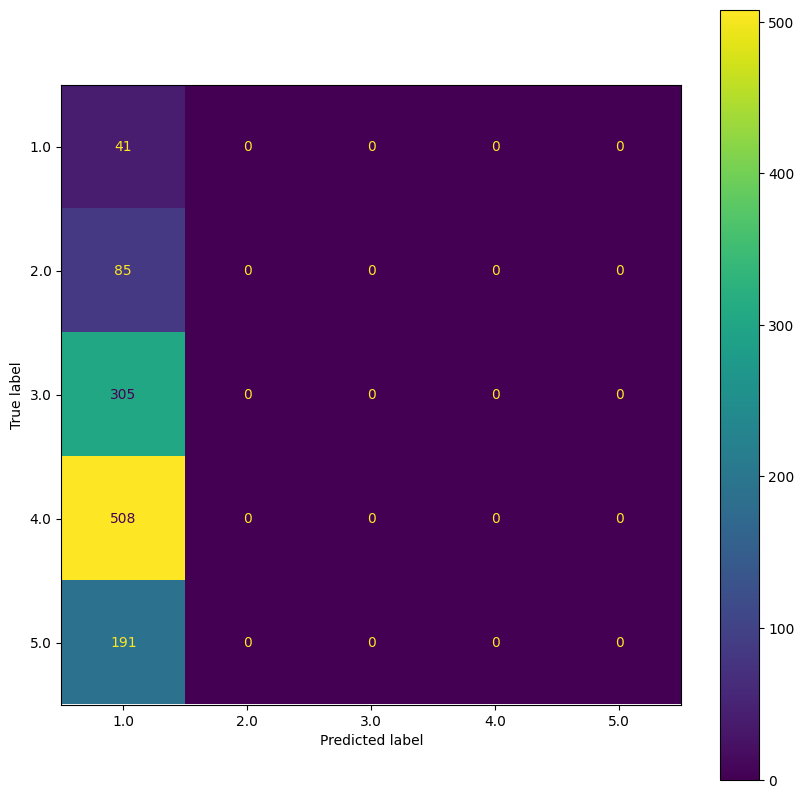

In [ ]:
# Convert labels to unique values
labels_tensor = labels
unique_labels = np.unique(labels)

# Assuming y_pred and y_test are numpy arrays
# Assuming preds_rounded is defined
y_pred = preds_rounded
y_test = labels

# Calculate confusion matrix
cm = confusion_matrix(labels, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()


### **GraphSAGE**

Train the Model

In [ ]:
#GraphSAGE
trainer = hyperparameter_optimization.GraphStudy(train_data_1, train_data_2, val_data_1, val_data_2, train_data_final, data, flag=2, EPOCHS=30, LR=0.0001)
study, best_model = trainer.run_study(n_trials=50)

[I 2024-03-23 16:15:21,508] A new study created in memory with name: no-name-ad4c9dd2-cc81-43ab-9248-ba5a4ebeec2c
[I 2024-03-23 16:15:27,656] Trial 0 finished with value: 1.644571207482846 and parameters: {'hidden_channels_encoder': 33, 'latent_space_dim': 51, 'hidden_channels_predictor': 167, 'dropout_rate': 0.2797673432975205}. Best is trial 0 with value: 1.644571207482846.
[I 2024-03-23 16:15:42,873] Trial 1 finished with value: 2.9092337334284832 and parameters: {'hidden_channels_encoder': 183, 'latent_space_dim': 247, 'hidden_channels_predictor': 90, 'dropout_rate': 0.4196753562313988}. Best is trial 0 with value: 1.644571207482846.
[I 2024-03-23 16:15:52,416] Trial 2 finished with value: 3.747035059627593 and parameters: {'hidden_channels_encoder': 165, 'latent_space_dim': 85, 'hidden_channels_predictor': 91, 'dropout_rate': 0.7810607561901611}. Best is trial 0 with value: 1.644571207482846.
[I 2024-03-23 16:16:08,503] Trial 3 finished with value: 2.028390429314977 and parameters

Evaluate the Model

In [ ]:
best_model.eval()
with torch.no_grad():
    test_output = best_model(test_data.x_dict, test_data.edge_index_dict, test_data['user', 'rating', 'movie'].edge_label_index, test_data)
preds = test_output.squeeze()
labels = test_data['user', 'rating', 'movie'].edge_label
mae = F.l1_loss(preds.double(), labels)
rmse = torch.sqrt(F.mse_loss(preds.double(), labels)).item()

print(f'Test MAE score: {(mae.detach().item()):.2f}')
print(f'Test RMSE score: {rmse:.2f}')

Test MAE score: 3.21
Test RMSE score: 3.50


Create the Classification Matrix

In [ ]:
round_preds = np.round(preds.detach().numpy())
preds_rounded = np.where(round_preds < 1, 1, np.where(round_preds > 5, 5, round_preds))
print(classification_report(y_true=labels, y_pred=preds_rounded))

              precision    recall  f1-score   support

         1.0       0.04      0.85      0.07        41
         2.0       0.00      0.00      0.00        85
         3.0       0.26      0.02      0.04       305
         4.0       0.34      0.08      0.13       508
         5.0       0.00      0.00      0.00       191

    accuracy                           0.07      1130
   macro avg       0.13      0.19      0.05      1130
weighted avg       0.22      0.07      0.07      1130



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Plot the Confusion Matrix

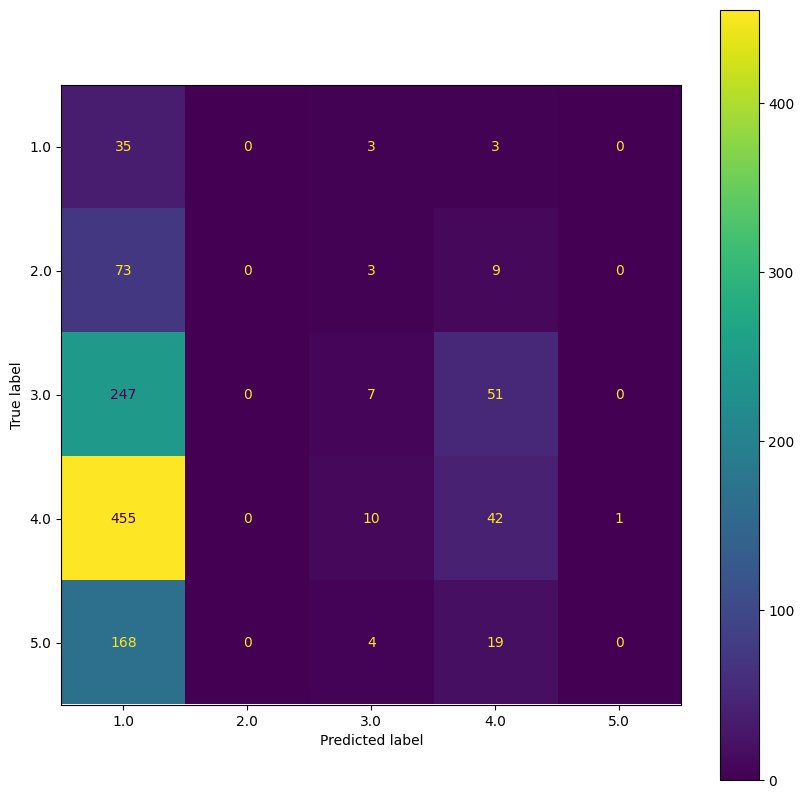

In [ ]:
# Convert labels to unique values
labels_tensor = labels
unique_labels = np.unique(labels)

# Assuming y_pred and y_test are numpy arrays
# Assuming preds_rounded is defined
y_pred = preds_rounded
y_test = labels

# Calculate confusion matrix
cm = confusion_matrix(labels, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()


### **GAT**

Train the Model

In [ ]:
#GAT
trainer = hyperparameter_optimization.GraphStudy(train_data_1, train_data_2, val_data_1, val_data_2, train_data_final, data, flag=3, EPOCHS=30, LR=0.0001)
study, best_model = trainer.run_study(n_trials=50)

[I 2024-03-23 16:28:51,301] A new study created in memory with name: no-name-8b114ca5-3adb-4331-aa4f-7bd201b9e224
[I 2024-03-23 16:30:14,493] Trial 0 finished with value: 1.6860931753157156 and parameters: {'hidden_channels_encoder': 246, 'latent_space_dim': 246, 'hidden_channels_predictor': 39, 'dropout_rate': 0.34328613153483617}. Best is trial 0 with value: 1.6860931753157156.
[I 2024-03-23 16:30:56,390] Trial 1 finished with value: 2.259318700459073 and parameters: {'hidden_channels_encoder': 141, 'latent_space_dim': 235, 'hidden_channels_predictor': 92, 'dropout_rate': 0.6138818804403725}. Best is trial 0 with value: 1.6860931753157156.
[I 2024-03-23 16:31:19,203] Trial 2 finished with value: 2.5710621172439416 and parameters: {'hidden_channels_encoder': 112, 'latent_space_dim': 45, 'hidden_channels_predictor': 86, 'dropout_rate': 0.49777114018969465}. Best is trial 0 with value: 1.6860931753157156.
[I 2024-03-23 16:31:50,610] Trial 3 finished with value: 2.537948429218053 and par

Evaluate the Model

In [ ]:
best_model.eval()
with torch.no_grad():
    test_output = best_model(test_data.x_dict, test_data.edge_index_dict, test_data['user', 'rating', 'movie'].edge_label_index, test_data)
preds = test_output.squeeze()
labels = test_data['user', 'rating', 'movie'].edge_label
mae = F.l1_loss(preds.double(), labels)
rmse = torch.sqrt(F.mse_loss(preds.double(), labels)).item()

print(f'Test MAE score: {(mae.detach().item()):.2f}')
print(f'Test RMSE score: {rmse:.2f}')

Test MAE score: 1.27
Test RMSE score: 1.71


Create the Classification Report

In [ ]:
round_preds = np.round(preds.detach().numpy())
preds_rounded = np.where(round_preds < 1, 1, np.where(round_preds > 5, 5, round_preds))
print(classification_report(y_true=labels, y_pred=preds_rounded))

              precision    recall  f1-score   support

         1.0       0.04      0.15      0.06        41
         2.0       0.02      0.01      0.01        85
         3.0       0.29      0.57      0.38       305
         4.0       0.43      0.27      0.33       508
         5.0       0.00      0.00      0.00       191

    accuracy                           0.28      1130
   macro avg       0.16      0.20      0.16      1130
weighted avg       0.27      0.28      0.26      1130



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Plot the Confusion Matrix

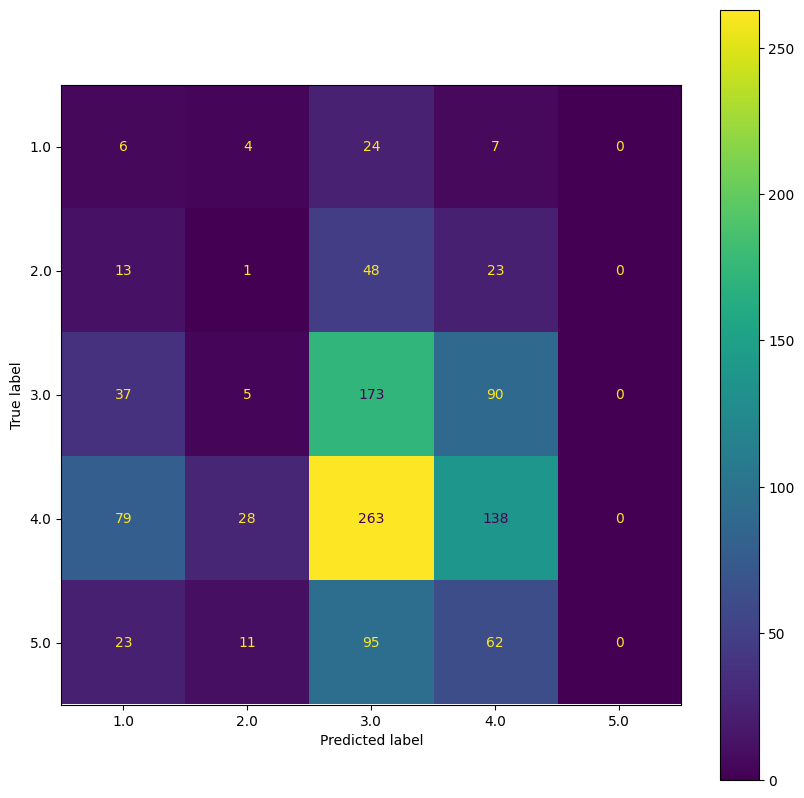

In [ ]:
# Convert labels to unique values
labels_tensor = labels
unique_labels = np.unique(labels)

# Assuming y_pred and y_test are numpy arrays
# Assuming preds_rounded is defined
y_pred = preds_rounded
y_test = labels

# Calculate confusion matrix
cm = confusion_matrix(labels, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()